# Figures: Deep learning paper

# Import

In [150]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns 
import pandas as pd 
import numpy as np
%matplotlib inline
cdict={}

lowframe=[0.14,0.006,0.79,0.24]
upframe=[0.14,0.25,0.79,0.79]
fsize=(3.5,3.5+1.0)
sns.set()

# Bar-graphs 

No handles with labels found to put in legend.


RCNN
LSTM
sCNN
dCNN
pCNN


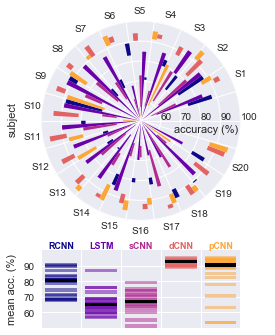

In [151]:
data_RCNN=pd.read_csv("RCNN.csv",index_col=0)
data_DeepCNN=pd.read_csv("DeepCNN.csv")
data_LSTM=pd.read_csv("LSTM.csv")
data_ShallowCNN=pd.read_csv("shallow-CNN.csv")
data_STFTDeepCNN=pd.read_csv("STFT_DeepCNN.csv")
# print (data.head, data.keys())

data=[(data_RCNN, 'RCNN'), 
      (data_LSTM,'LSTM'), 
      (data_ShallowCNN,'sCNN'), 
      (data_DeepCNN,'dCNN'), 
      (data_STFTDeepCNN, 'pCNN'), 
     ]
# This is only to load sns' matplotlib settings.


fig = plt.figure(figsize=fsize)
ax = plt.axes(upframe,polar=True)

Nsubjects=20

nsets=float(len(data))

maxang=2*np.pi
offset = maxang/(Nsubjects+1)
wsubj= (maxang-2*offset)/Nsubjects
w=width = wsubj/nsets 
ind = np.mgrid[offset:maxang-wsubj-offset:Nsubjects*1j] #arange(Nsubjects)    


means,mins,maxs,cols=[],[],[],[]
for i,(dhandle,dname) in enumerate(data):
    print(dname)
    dmin=np.array(dhandle["Max"])
    dmax=np.array(dhandle["Min"])
    dmean=np.array(dhandle["Mean"])
    c=plt.cm.plasma(i/(nsets))
    p=ax.bar(ind+i*w, dmax-dmin, width, bottom=dmin,label=dname,color=c,align="edge") #, yerr=KNNStd)
    means.append(np.median(dmean))
    mins.append(np.min(dmean))
    maxs.append(np.max(dmean))
    cols.append(c)
    cdict[dname]=c

plt.ylabel('accuracy (%)',rotation=0)
ax.yaxis.set_label_coords(0.83,0.485) # innen:.84, außen:0.898
ax.yaxis.set_label_position("right")
ax.yaxis.set_ticks_position("none")
ax.set_rlabel_position(0)

plt.xlabel('subject',rotation=90)
ax.xaxis.set_label_coords(-0.145,0.6)

ymax=100 #100
ax.set_ylim(50,ymax)
ax.set_yticks(np.arange(60, ymax+1, 10))
ax.set_yticklabels(["%i"%i for i in np.arange(60, ymax+1, 10)])

ax.set_xticks(np.append(np.append([0],ind),ind[-1:]+offset),minor=False)
ax.set_xticklabels([""]+["" for i in range(Nsubjects)],minor=False,visible=False)
#ind[-1] -= 1.5*w
ax.set_xticks(np.append([0],ind+w*nsets/2.),minor=True)
ax.set_xticklabels([""]+["S%i"%(i+1) for i in range(Nsubjects)],minor=True)

ax2 = plt.axes(lowframe,polar=False)

#ax2.bar(np.arange(len(data))+.5,np.array(maxs)-mins,bottom=mins,color=cols,align="center")
#ax2.bar(np.arange(len(data))+.5,np.array(means),width=0.8,color=cols,align="center")

for i,(D,dname) in enumerate(data):
    m=np.array(D["Mean"])
    c=cdict[dname]
    barwidths=np.ones_like(m)*2.0
    ax2.bar(np.ones_like(m)*i+.5,barwidths,width=.8,bottom=m-barwidths/2.,
            color=c,align="center",alpha=0.5)

barwidths=np.ones_like(means)*2.0
ax2.bar(np.arange(len(data))+.5,barwidths,width=0.8,bottom=np.array(means)-barwidths/2.,color="k",align="center")
#edgecolor="k",facecolor="k",lw=0.7

ax2.set_xlim(0,len(data))
#ax2.set_xlabel("Algorithm",labelpad=0)
ax2.set_ylim(50,100)
ax2.set_ylabel("mean acc. (%)",labelpad=6)
ax2.set_yticks(range(60,100,10))
#yt = ["%i"%i for i in range(50,101,10)]
#yt[1]=yt[3]=yt[5]=""
#ax2.set_yticklabels(yt)

ax2.xaxis.set_ticklabels([])

SMALL_SIZE = 8
MEDIUM_SIZE = 9
BIGGER_SIZE = 9

for i,(c,D) in enumerate(zip(cols,data)):
    ax2.text(i+.5,100,D[-1],color=c,ha="center",va="bottom",size=BIGGER_SIZE,weight="semibold") #


plt.legend(loc=(1.1,0.5))
plt.show()  
fig.savefig("learning_comparison.pdf")    

# NST data: S1-S20  (Figure 11)

No handles with labels found to put in legend.


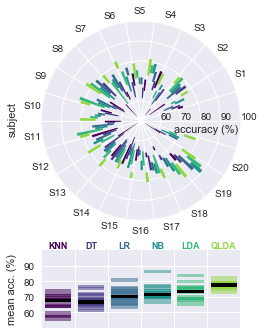

In [152]:
from pylab import rcParams
# rcParams['figure.figsize'] = 12, 6

# This is only to load sns' matplotlib settings.
sns.set()

# Mean accuracy 
KNN = (70.90476190476191, 59.904761904761905, 55.61904761904761,72.33333333333333,67.95238095238096, 
      71.0,64.0, 57.047619047619044, 63.95238095238095, 67.95238095238096, 63.95238095238095,  
      68.95238095238095, 57.90476190476191, 69.28571428571428,
      68.19047619047619, 67.28571428571428, 67.38095238095238, 65.33333333333333,
      74.23809523809524, 57.047619047619044)

Nsubjects = len(KNN)


QudraticLDA = (75.80952380952381, 77.19047619047619, 72.99999999999999,  77.14285714285714, 75.14285714285714,
              80.52380952380952,77.23809523809523, 78.71428571428571, 79.19047619047619,
              76.6190476190476, 79.19047619047619, 77.23809523809524, 78.47619047619048, 74.42857142857143,
              77.76190476190476, 78.52380952380952, 78.57142857142857,
              82.09523809523809, 79.19047619047619,
              75.80952380952381)

LogisticRegression = (65.23809523809523, 71.66666666666667, 63.38095238095238, 73.04761904761905,
                      70.04761904761905, 75.66666666666666, 72.28571428571428, 75.28571428571428,
                      69.0952380952381, 70.04761904761905, 69.0952380952381, 70.33333333333334, 70.28571428571428, 67.28571428571428, 
                      65.95238095238096, 65.95238095238096, 
                      73.66666666666667, 74.19047619047619, 80.71428571428572, 
                      68.14285714285715) 
 


NaiveBayes = (71.71428571428571,73.8095238095238, 69.47619047619048, 77.0, 70.0952380952381, 
              69.3809523809524, 72.52380952380952,71.66666666666666,70.0952380952381, 71.66666666666666,
              70.12, 73.66666666666667, 70.33333333333334, 69.3809523809524,
              68.19047619047619, 72.38095238095237, 75.04761904761905,
              76.42857142857142,  86.23809523809524, 66.0952380952381)



DecisionTree = (68.76190476190476,75.19047619047619, 65.99999999999999, 68.66666666666667,  64.0,
                65.99999999999999, 68.04761904761905, 72.14285714285714, 62.57142857142857, 65.0,
                65.0, 66.6190476190476,  66.6190476190476, 68.14285714285715, 
                64.57142857142857, 65.38095238095238, 71.61904761904762,
                70.90476190476191, 76.47619047619048, 61.142857142857146)
              

LDA = (68.71428571428571,75.28571428571429,  64.85714285714286, 76.47619047619048, 
       73.57142857142858, 72.85714285714285, 
       67.38095238095238, 75.33333333333333, 76.0952380952381, 73.57142857142858, 
       76.0952380952381, 68.95238095238095, 73.71428571428572, 70.19047619047619, 
       68.66666666666667, 68.90476190476191, 73.0952380952381, 79.71428571428572,
       83.52380952380953, 67.23809523809524)


##################################################################################
# Standard deviation 

LDAStd = (2.4907993963089536, 9.253791280400941, 4.016406263611342, 4.016406263611342, 3.791624616646548,
         7.158712561129957,13.363910517075084, 11.950009250558567, 13.25196258943012, 3.791624616646548, 
         13.25196258943012, 7.256, 5.054353100127748, 7.864210385579861, 
         7.475735503292821, 7.079720967636496,  9.640946312732414, 
         7.214560736546279, 8.477795460673484, 4.130523512800274)


LRStd = (5.1198781164630915,8.96453076247626, 7.275592097060677, 5.275623142955272, 
        3.507038598004181, 3.9227229193559943,9.789623828006754,9.789623828006754, 10.92377215919213, 
        3.507038598004181, 10.92377215919213, 8.108672326184111, 7.122829064181663, 9.906135435899131,
        4.45180795905533, 2.6726124191242464, 4.215294471682044, 5.152108081851043,
        9.915744826529806, 4.836088822803074)

NBStd = (5.1198781164630915, 6.254250255506523, 2.963879298970559, 4.8762462794426,3.091939634428174,
        7.8298226320255555, 5.365548960382199,9.300476665910836, 6.288599626369211,
        3.091939634428174, 6.23,  5.287439740567,6.497164914594491, 9.878628527650061,  12.76829974812817,
        4.844521416518051, 5.339707075798146, 7.839084587216346, 6.841914306918788,
        9.673349789246984)


QDStd = (4.007928650000155, 4.007928650000156, 6.251711783724309, 8.396360295577598, 7.801970795851503,
        3.5456210417116734, 4.848264528080163, 8.672159431557358, 4.7322888566875605,
        7.801970795851503, 4.7322888566875605, 7.266548086157237,4.640353415268506,  4.458424724093497,
        2.8515818898247365, 4.940461847368735, 5.030519103331146, 8.097198642144091,
        8.175512355049909, 6.062037555123516)


KNNStd = (2.68699732946017,9.444431105766226, 4.334641351514389, 8.967565642920643, 5.693613401003857,
         6.253162465211226, 4.179639668093657, 8.146337323692363, 8.217011280046854,
         5.693613401003857,8.217011280046854, 13.4067705506822, 11.658792289157716, 7.429181904097675,
         10.730252652918516, 5.881675297769339, 2.3328473740792175, 2.08981983404683,
         4.503463016204529, 9.05588594753625)


TreeStd=(4.693315553460446, 6.2658416014974945, 7.292713724628697, 4.630569821387893, 
        5.28249580262606, 7.794701380714497, 8.559515530825855, 9.225568335398698,6.945528260095946,
        6.910506641398759,3.7355921252295614, 7.119644822856554, 11.821038932820043, 12.772561293470657,
        11.818161203857512,  5.061078192604351, 7.555388820355797, 2.68699732946017,
        5.195497789327944, 6.134176221289392)

     
fig = plt.figure(figsize=fsize)
ax = plt.axes(upframe,polar=True)

data=[(KNN, KNNStd, 'KNN'), 
      (DecisionTree, TreeStd,'DT'), 
      (LogisticRegression, LRStd,'LR'), 
      (NaiveBayes, NBStd,'NB'), 
      (LDA,LDAStd,'LDA'),
      (QudraticLDA,QDStd, 'QLDA'), 
     ]
nsets=float(len(data))

maxang=2*np.pi
offset = maxang/(Nsubjects+1)
wsubj= (maxang-2*offset)/Nsubjects
w=width = wsubj/nsets 
ind = np.mgrid[offset:maxang-wsubj-offset:Nsubjects*1j] #arange(Nsubjects)    


means,mins,maxs,cols=[],[],[],[]
for i,(d,dstd,dname) in enumerate(data):
    c=plt.cm.viridis(i/nsets)
    p=ax.bar(ind+i*w, dstd, width, bottom=np.array(d)-np.array(dstd)/2.,label=dname,color=c,align="edge") #, yerr=KNNStd)
#    p=ax.bar(ind+i*w, dstd, width, bottom=np.array(d)-np.array(dstd)/2.,label=dname,color=c) #, yerr=KNNStd)
    means.append(np.median(d))
    mins.append(np.min(d))
    maxs.append(np.max(d))
    cols.append(c)
    cdict[dname]=c

plt.ylabel('accuracy (%)',rotation=0)
ax.yaxis.set_label_coords(0.83,0.485) # innen:.84, außen:0.898
ax.yaxis.set_label_position("right")
ax.yaxis.set_ticks_position("none")
ax.set_rlabel_position(0)

plt.xlabel('subject',rotation=90)
ax.xaxis.set_label_coords(-0.145,0.6)

ymax=100 #100
ax.set_ylim(50,ymax)
ax.set_yticks(np.arange(60, ymax+1, 10))
ax.set_yticklabels(["%i"%i for i in np.arange(60, ymax+1, 10)])

ax.set_xticks(np.append(np.append([0],ind),ind[-1:]+offset),minor=False)
ax.set_xticklabels([""]+["" for i in range(Nsubjects)],minor=False,visible=False)
#ind[-1] -= 1.5*w
ax.set_xticks(np.append([0],ind+w*nsets/2.),minor=True)
ax.set_xticklabels([""]+["S%i"%(i+1) for i in range(Nsubjects)],minor=True)


ax2 = plt.axes(lowframe,polar=False)
#ax2.bar(np.arange(len(data))+.5,np.array(maxs)-mins,bottom=mins,color=cols,align="center")
for i,(m,dst,dname) in enumerate(data):
    barwidths=np.ones_like(m)*2.0
    ax2.bar(np.ones_like(m)*i+.5,barwidths,width=.8,bottom=m-barwidths/2.,color=cdict[dname],align="center",alpha=0.5)
barwidths=np.ones_like(means)*2.0
ax2.bar(np.arange(len(data))+.5,barwidths,bottom=np.array(means)-barwidths/2.,color="k",align="center")
ax2.set_xlim(0,len(data))
#ax2.set_xlabel("Algorithm",labelpad=0)
ax2.set_ylim(50,100)
ax2.set_ylabel("mean acc. (%)",labelpad=6)
ax2.set_yticks(range(60,100,10))
#yt = ["%i"%i for i in range(50,101,10)]
#yt[1]=yt[3]=yt[5]=""
#ax2.set_yticklabels(yt)

ax2.xaxis.set_ticklabels([])

SMALL_SIZE = 8
MEDIUM_SIZE = 9
BIGGER_SIZE = 9

for i,(c,D) in enumerate(zip(cols,data)):
    ax2.text(i+.5,100,D[2],color=c,ha="center",va="bottom",size=BIGGER_SIZE,weight="semibold") #




plt.legend(loc=(1.1,0.5))
plt.show()  
fig.savefig("classical_comparison_100.pdf")

# NST data: S11-S20  (Figure 11)

# Graz data: B01-B09  (Figure 12)

No handles with labels found to put in legend.


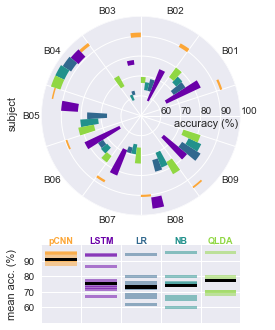

In [153]:
# rcParams['figure.figsize'] = 12, 6

Nsubjects = 9


# Mean accuracy 
proposedCNN = (92.43, 90.48, 90.62, 94.36, 95.22, 89.32, 87.56, 90.24, 94.5)

proposedlstm = (73.74,66.69,77.05,93.22,85.92,71.6,75.45,94.18,72.58)

qudraticLDA = (77.0,68.00,70.00,95.00,78.00,77.0,70.00,80.00,77.0)

LogisticRegression = (73.00,66.0,62.0,94.00,72.00,74.00,68.00,76.00,80.00)

NaiveBayes = (75.00,65.00,60.00,95.00,76.00,74.00,67.00,74.00,80.0)



##################################################################################
# Standard deviation 

LDAStd = (6.00,3.00,6.00,5.00,8.00,4.0,8.00,7,9)


LRStd = (7.00,6.00,2.00,5.00,10.0,3.00,3.00,6.00,11.00)

NBStd = (4.00,4.00,3.00,5.00,9.00,4.00,5.00,8.00,7.00)



CNNStd = (1.1385, 1.99, 2.34, 1.64, 0.766,0.92,1.21,1.084,0.915)

LSTMStd = (19.013, 16.968, 2.35, 5.05, 8.46,19.375,13.72,5.66,15.18)

fig = plt.figure(figsize=(3.5,3.5+1.0))
ax = plt.axes(upframe,polar=True)

data=[(proposedCNN, CNNStd, 'pCNN'), 
      (proposedlstm, LSTMStd,'LSTM'), 
      (LogisticRegression, LRStd,'LR'), 
      (NaiveBayes, NBStd,'NB'), 
      (qudraticLDA,LDAStd,'QLDA'), 
     ]
nsets=float(len(data))

maxang=2*np.pi
offset = maxang/(Nsubjects+1)/2
wsubj= (maxang-2*offset)/Nsubjects
w=width = wsubj/nsets 
ind = np.mgrid[offset:maxang-wsubj-offset:Nsubjects*1j] #arange(Nsubjects)    

means,mins,maxs,cols=[],[],[],[]
for i,(d,dstd,dname) in enumerate(data):
    c = cdict.get(dname)
    if c == None:
        c=plt.cm.brg(i/nsets)
    p=ax.bar(ind+i*w, dstd, width, bottom=np.array(d)-np.array(dstd)/2.,label=dname,color=c,align="edge") #, yerr=KNNStd)
#    p=ax.bar(ind+i*w, dstd, width, bottom=np.array(d)-np.array(dstd)/2.,label=dname,color=c) #, yerr=KNNStd)
    means.append(np.median(d))
    mins.append(np.min(d))
    maxs.append(np.max(d))
    cols.append(c)

plt.ylabel('accuracy (%)',rotation=0)
ax.yaxis.set_label_coords(0.83,0.485) # innen:.84, außen:0.898
ax.yaxis.set_label_position("right")
ax.yaxis.set_ticks_position("none")
ax.set_rlabel_position(0)

plt.xlabel('subject',rotation=90)
ax.xaxis.set_label_coords(-0.145,0.6)

ax.set_ylim(50,100)
ax.set_yticks(np.arange(60, 101, 10))
ax.yaxis.set_ticklabels(["%i"%i for i in np.arange(60, 101, 10)]) #add rotation=... doesn't work!?

ax.set_xticks(np.append(np.append([0],ind),ind[-1:]+2*offset),minor=False)
ax.set_xticklabels([""]+["" for i in range(Nsubjects)],minor=False,visible=False)
#ind[-1] -= 1.5*w
ax.set_xticks(np.append([0],ind+w*nsets/2.),minor=True)
ax.set_xticklabels([""]+["B%02i"%(i+1) for i in range(Nsubjects)],minor=True)



ax2 = plt.axes(lowframe,polar=False)
#ax2.bar(np.arange(len(data))+.5,np.array(maxs)-mins,bottom=mins,color=cols,align="center")
for i,(m,dst,dname) in enumerate(data):
    barwidths=np.ones_like(m)*2.0
    ax2.bar(np.ones_like(m)*i+.5,barwidths,bottom=m-barwidths/2.,color=cdict[dname],align="center",alpha=0.5)
barwidths=np.ones_like(means)*2.0
ax2.bar(np.arange(len(data))+.5,barwidths,bottom=np.array(means)-barwidths/2.,color="k",align="center")
ax2.set_xlim(0,len(data))
#ax2.set_xlabel("Algorithm",labelpad=0)
ax2.set_ylim(50,100)
ax2.set_ylabel("mean acc. (%)",labelpad=6)
ax2.set_yticks(range(60,100,10))
#yt = ["%i"%i for i in range(50,101,10)]
#yt[1]=yt[3]=yt[5]=""
#ax2.set_yticklabels(yt)

ax2.xaxis.set_ticklabels([])

SMALL_SIZE = 8
MEDIUM_SIZE = 9
BIGGER_SIZE = 9

for i,(c,D) in enumerate(zip(cols,data)):
    ax2.text(i+.5,100,D[2],color=c,ha="center",va="bottom",size=BIGGER_SIZE,weight="semibold") #


plt.legend(loc=(1.1,0.5))
plt.show()  
fig.savefig("graz_comparison.pdf")